<a href="https://colab.research.google.com/github/WittyFrost/trails/blob/master/Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Exercise: K-Means**

**Objective**

In this exercise, you will practice data preprocessing and clustering using the K-Means algorithm. The goal is to segment a dataset into meaningful clusters and evaluate the cluster quality. The dataset used here involves car evaluations based on several features.

**Libraries**

*  os: To interact with the operating system
*  numpy (np): For numerical operations
*  pandas (pd): For data manipulation and analysis
*  matplotlib.pyplot (plt): For plotting graphs
*  sklearn.cluster (KMeans): To perform K-means clustering

**Steps**

*  Data Loading: Import the dataset using pandas and explore the initial data structure.
*  Data Preprocessing:
1. Check for missing values and data types.
2. Encode categorical variables into numerical format using pd.factorize().
*  Feature Selection: Identify predictor variables. In this exercise, all features are used as predictors.
*  Model Building:
1. Instantiate the KMeans class with a specified number of clusters.
2. Fit the model on the entire dataset.
*  Evaluation:
1. Evaluate the model using inertia to understand the within-cluster sum of squares.
2. Compare the clusters with the actual labels (if available) to check the labeling accuracy.
*  Optimization:
1. Use the elbow method to find the optimal number of clusters.
2. Plot the inertia values against the number of clusters and identify the elbow point.

**Tasks**

*  Parameter Tuning:

1. Experiment with different values for n_init and max_iter in the KMeans constructor to see if there's an improvement in the clustering stability and convergence.

2. Try different initialization methods for centroids such as k-means++ (default) and random to observe any differences in the resulting clusters.

*  Cluster Validation:

1. Apart from using the elbow method, incorporate other metrics like the Silhouette score or Davies-Bouldin index to validate the quality of the clusters formed.

2. Compare these metrics across different cluster configurations to choose the best model.

**Import necessary libraries**

Import the necessary modules from specific libraries.

In [ ]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Load the data set**

Use pandas module to read the bike data from the file system. Check few records of the dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car-eval.csv to car-eval.csv


In [ ]:
data = pd.read_csv('car-eval.csv',names=['buying','maint','doors','persons','lug_boot','safety','class'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,buying,maint,doors,persons,lug_boot,safety,clazz
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc


**Check few information about the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1729 non-null   object
 1   maint     1729 non-null   object
 2   doors     1729 non-null   object
 3   persons   1729 non-null   object
 4   lug_boot  1729 non-null   object
 5   safety    1729 non-null   object
 6   class     1729 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


The train data set has 1728 rows and 7 columns.

There are no missing values in the dataset

**Identify the target variable**

In [ ]:
data['class'],class_names = pd.factorize(data['class'])

The target variable is marked as class in the dataframe. The values are present in  string format. However the algorithm requires the variables to be coded into its equivalent integer codes. We can convert the string categorical values into a integer code using factorize method of the pandas library.

Let’s check the encoded values now.

In [ ]:
print(class_names)
print(data['class'].unique())

Index(['clazz', 'unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3 4]


As we can see the values has been encoded into 4 different numeric labels.

**Identify the predictor variables and encode any string variables to equivalent integer codes**

In [ ]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,1,1,1,1,1,2,1
3,1,1,1,1,1,3,1
4,1,1,1,1,2,1,1


**Check the data types now :**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1729 non-null   int64
 1   maint     1729 non-null   int64
 2   doors     1729 non-null   int64
 3   persons   1729 non-null   int64
 4   lug_boot  1729 non-null   int64
 5   safety    1729 non-null   int64
 6   class     1729 non-null   int64
dtypes: int64(7)
memory usage: 94.7 KB


Everything is now converted in integer form.

**Select the predictor feature and select the target variable**

In clustering there is no target variable as such. However clustering helps us to find a cluster which can be used as weak labels. These weak labels can bootstrap our supervised learning.
This technique is widely used for semi-supervised learning.
We need not worry about it as of now. You can just consider that y value will be used to validate the accuracy of weak labeling going ahead.

In [ ]:
X = data
y = data.iloc[:,-1]

**Training / model fitting**

In [ ]:
model = KMeans(n_clusters=4,random_state=123)
model.fit(X)

KMeans(n_clusters=4, random_state=123)

**Check few parameters of the learnt cluster (Model parameters study):**

Check the cluster centroids or means :
It should be 4 vectors or a matrix with 4 rows since the number of clusters we have fitted is 4.

In [ ]:
model.cluster_centers_

array([[3.51871658, 3.52941176, 2.79679144, 2.12032086, 2.04545455,
        2.14973262, 2.10695187],
       [3.38073394, 1.49541284, 2.08256881, 1.9587156 , 1.98165138,
        1.94724771, 1.26834862],
       [1.73960613, 2.25164114, 3.60612691, 1.96280088, 1.99124726,
        1.95842451, 1.20131291],
       [1.59090909, 2.85497835, 1.55411255, 1.97402597, 1.98484848,
        1.96536797, 1.20995671]])

**Check the goodness of the cluster i.e. within sum of square of the model:**

In [ ]:
model.inertia_

7308.535351109042

Lesser this number better is the model fit.

**Check the quality of the weak classification by the model**

In [ ]:
labels = model.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 413 out of 1729 samples were correctly labeled.


**How do we know value of optimal value of K**

The value of k basically means that in how many clusters you can separate out the most homogeneous data. Choosing a large value of K will lead to greater amount of execution time. Selecting the small value of K might or might not give a good fit. There is no such guaranteed way to find the best value of K. However we can run few experiments and find the value of each model’s inertia and plot it on a graph. This plot is also known as elbow plot. We basically try to find the value of k from where there is major shift in value of inertia.

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


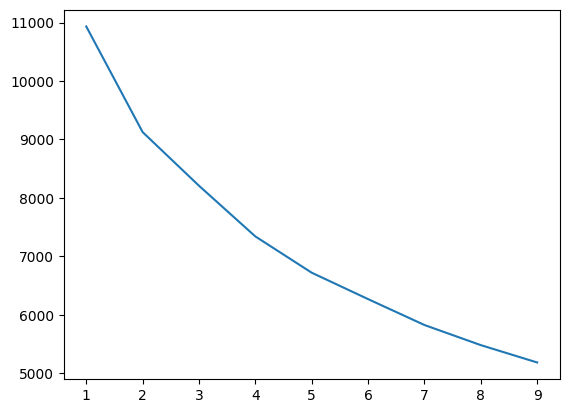

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def elbow_plot(data, maxK=40, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(X, maxK=10)

In [ ]:
model = KMeans(n_clusters=2,random_state=123)
model.fit(X)
labels = model.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print("correct %.02f classification " % (correct_labels/float(y.size)))

Result: 512 out of 1729 samples were correctly labeled.
correct 0.30 classification 


**Confusion Matrix Plot**

This plot can help you visualize the accuracy of the clusters formed by KMeans as compared to the true labels.

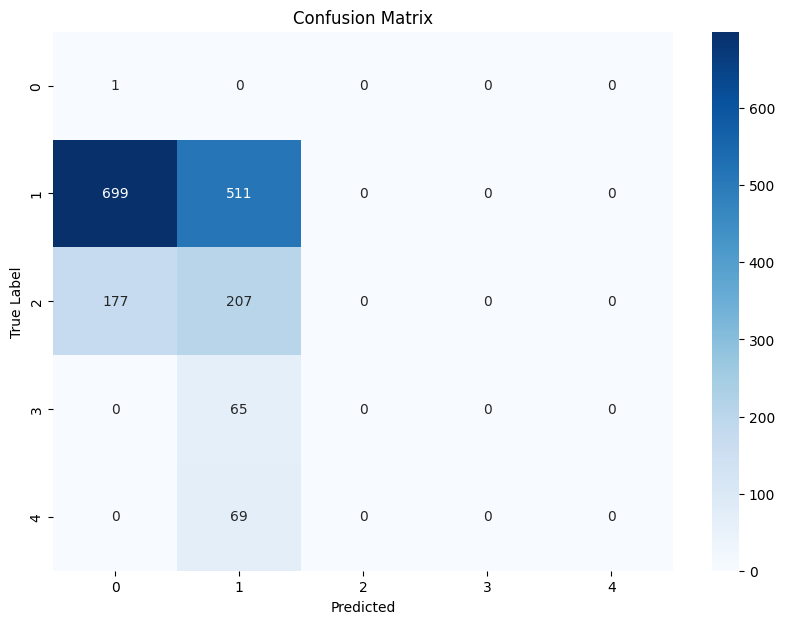

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y contains true labels and labels contains your cluster labels
conf_matrix = confusion_matrix(y, labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Silhouette Score Plot**

This plot evaluates the quality of the clusters formed by KMeans. A silhouette score near +1 indicates that samples are far away from neighboring clusters.

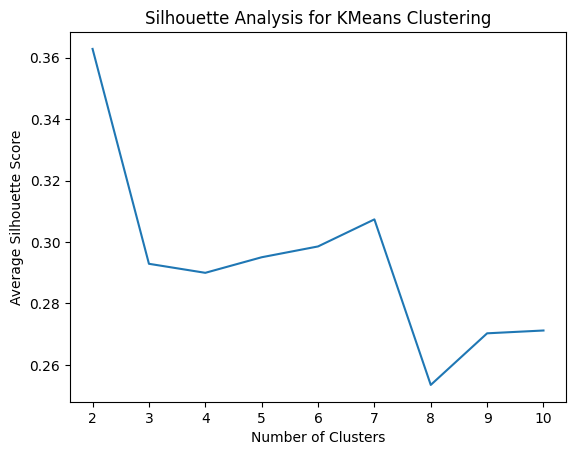

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(data, max_clusters=10):
    silhouette_avg = []
    for num_clusters in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=num_clusters, random_state=123)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg.append(silhouette_score(data, cluster_labels))

    plt.figure()
    plt.plot(range(2, max_clusters+1), silhouette_avg)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Average Silhouette Score")
    plt.title("Silhouette Analysis for KMeans Clustering")
    plt.show()

plot_silhouette(X)


**Cluster Centroid Plot**

Visualizing the centroids for clusters can help in understanding the typical characteristics of each cluster, which is especially useful in a multidimensional dataset.

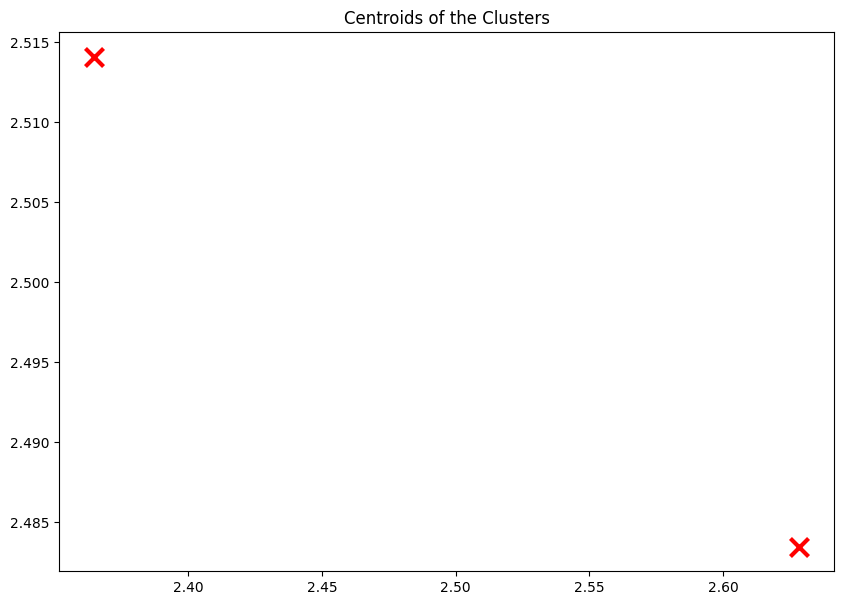

In [ ]:
def plot_centroids(centers, labels=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=169, linewidths=3,
                color='r', zorder=10)
    if labels is not None:
        for i, c in enumerate(centers):
            plt.annotate(labels[i], (c[0], c[1]), fontsize=12)
    plt.title('Centroids of the Clusters')
    plt.show()

plot_centroids(model.cluster_centers_)


**Pair Plot**

A pair plot can be helpful to see the distribution of data points across different clusters in various dimensions.

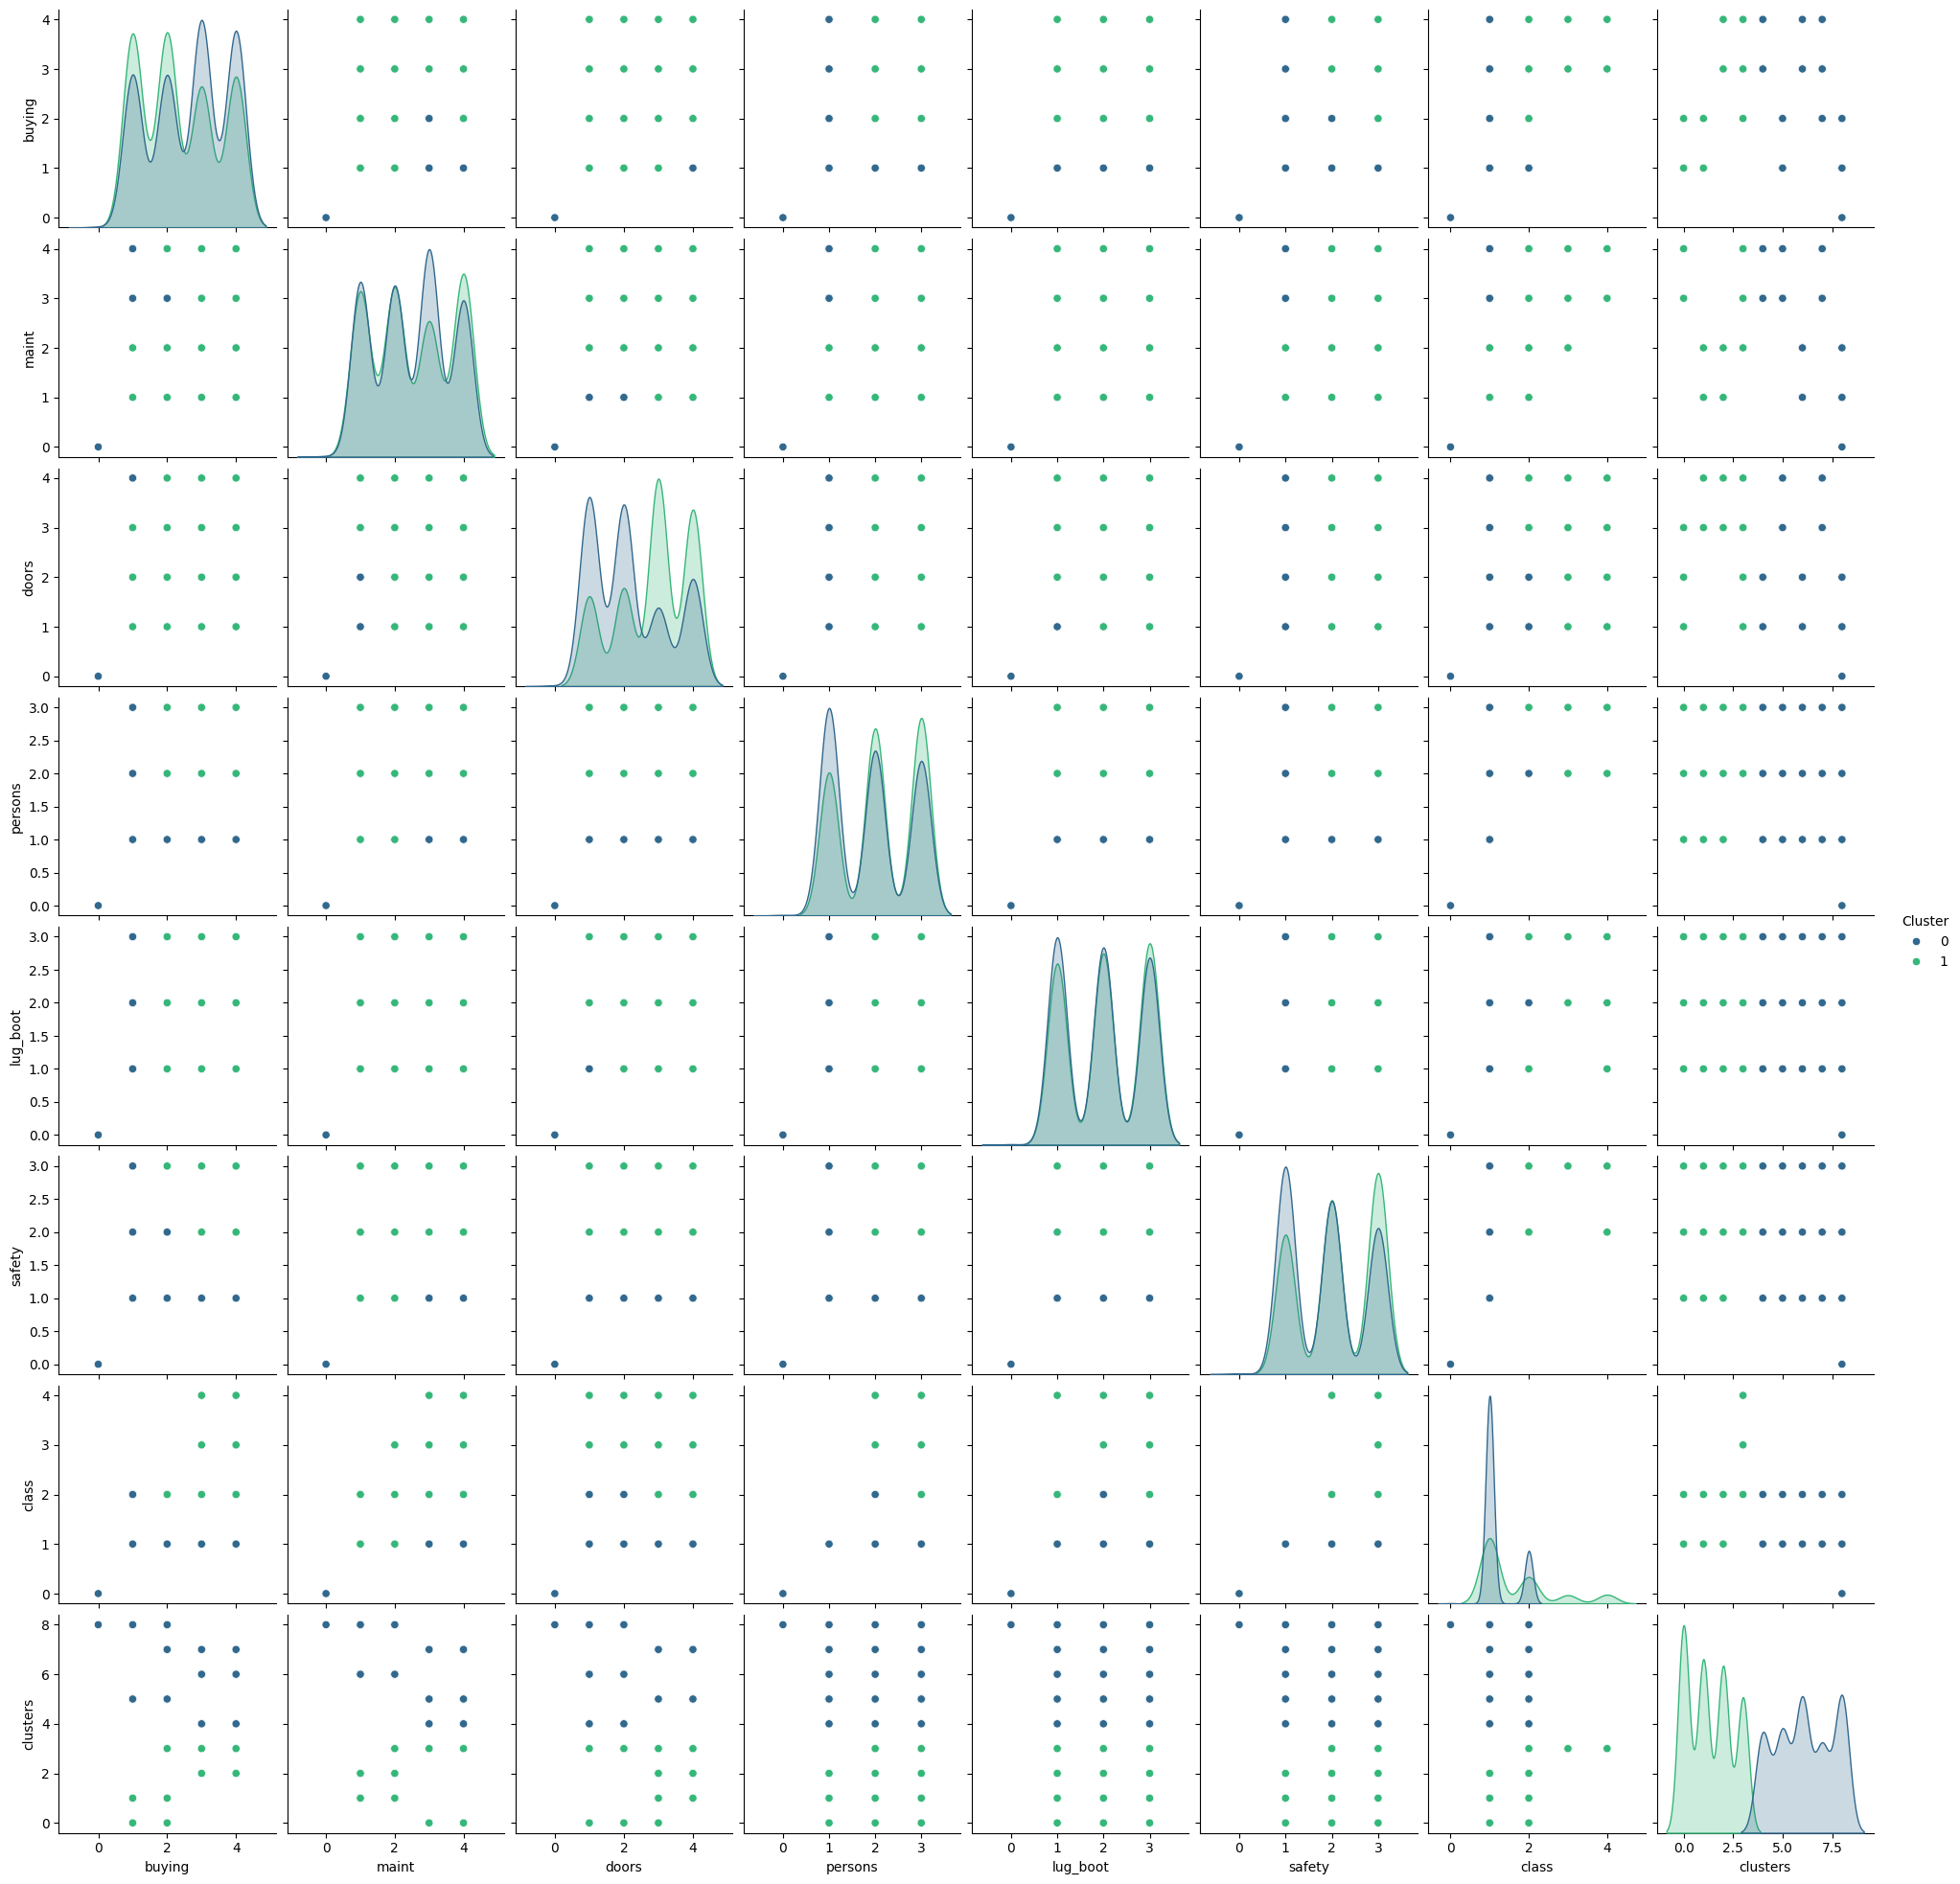

In [ ]:
sns.pairplot(data.join(pd.DataFrame(labels, columns=['Cluster'])), hue='Cluster', palette='viridis')
plt.show()
